In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Accuracy on test set: 0.5483870967741935


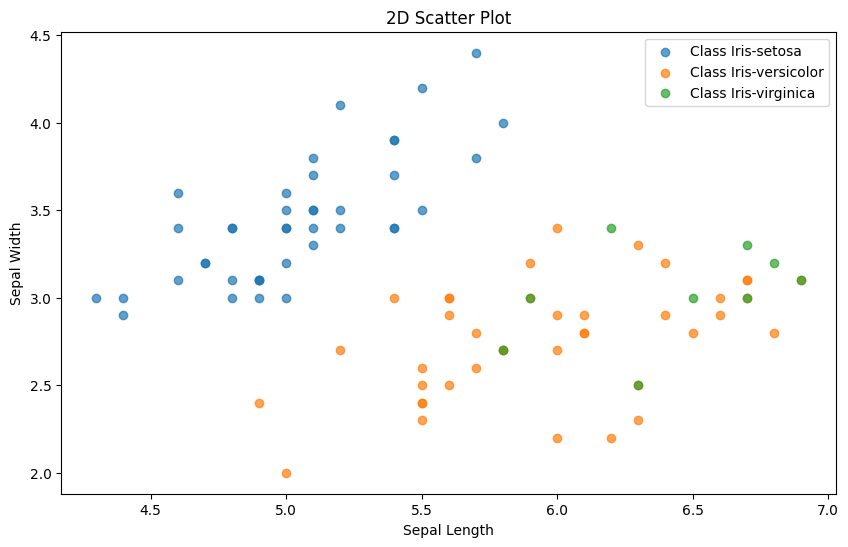

In [254]:
# Učitavanje podataka iz CSV fajla
iris_data = np.genfromtxt('iris.csv', delimiter=',', dtype=None, encoding=None)

# Izdvajanje feature-a (prva dva feature-a) i oznaka klasa
X = iris_data[1:, :2].astype(float)
y = iris_data[1:, -1]


# Dictionary to map string labels to numerical values
class_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# Replace string labels with numerical values
y_numeric = np.array([class_map[label] if label in class_map else label for label in y])

X_train_part1 = X[:41]
X_train_part2 = X[51:91]
X_train_part3 = X[141:151]
X_train = np.concatenate([X_train_part1, X_train_part2, X_train_part3], axis=0)
X_test_part1 = X[41:52]
X_test_part2 = X[91:102]
X_test_part3 = X[141:152]
X_test = np.concatenate([X_test_part1, X_test_part2, X_test_part3], axis=0)# Select elements from indices 0 to 40 (inclusive)
y_train_part1 = y[:41]
y_train_part2 = y[51:91]
y_train_part3 = y[141:151]
y_train = np.concatenate([y_train_part1, y_train_part2, y_train_part3], axis=0)
y_test_part1 = y[41:52]
y_test_part2 = y[91:102]
y_test_part3 = y[141:152]
y_test = np.concatenate([y_test_part1, y_test_part2, y_test_part3], axis=0)
class KNN:

    def __init__(self, k,features):
        self.k = k
        self.features = features

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # Expand dimensions of X_test to match the shape of self.X_train
        expanded_X_test = tf.expand_dims(X_test, axis=1)
        # Reshape expanded_X_test to match the shape of self.X_train
        expanded_X_test = tf.reshape(expanded_X_test, [-1, 1, 2])
        # Compute Euclidean distances between X_train and expanded_X_test
        squared_distances = tf.reduce_sum(tf.square(tf.subtract(self.X_train, expanded_X_test)), axis=2)
        distances = tf.sqrt(squared_distances)
        # Find the indices of the top k nearest neighbors
        _, top_k_indices = tf.nn.top_k(-distances, k=self.k)
        # Gather the labels of the top k nearest neighbors
        top_k_labels = tf.gather(self.y_train, top_k_indices)
        # Count occurrences of each label in the top k neighbors
        unique_labels, _, counts = tf.unique_with_counts(tf.reshape(top_k_labels, [-1]))
        # Find the label with the maximum count (mode)
        predicted_label = unique_labels[tf.argmax(counts)]
        return predicted_label

# Kreiranje i treniranje modela
knn = KNN(k=3,features=2)
knn.fit(X_train, y_numeric)

# Predviđanje oznaka klasa za test skup
predictions = []
for sample in X_test:
    predicted_label = knn.predict(sample)
    predictions.append(predicted_label.numpy())

# Izračunavanje tačnosti modela
ytest = np.array([class_map[label] if label in class_map else label for label in y_test])
accuracy = np.mean(predictions == ytest)
print("Accuracy on test set:", accuracy)

# Kreiranje i prikazivanje 2D grafika
plt.figure(figsize=(10, 6))

# Prikazivanje trening podataka
for class_label in np.unique(y_train):
    indices = np.where(y_train == class_label)
    plt.scatter(X_train[indices, 0], X_train[indices, 1], label=f'Class {class_label}', alpha=0.7)

# Prikazivanje oblasti koje bivaju klasifikovane u svaku od klasa
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
#Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.numpy().reshape(xx.shape)
#plt.contourf(xx, yy, Z, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('2D Scatter Plot')
plt.legend()
plt.show()